# Exploratory Data Analysis

In [ ]:
!pip install pyspark

     |████████████████████████████████| 212.3MB 74kB/s 
     |████████████████████████████████| 204kB 20.5MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=01195851088d975b8742514c9d50caec92534a6acc7cad1ed2cf05f9411a5ede
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark


In [ ]:
import pyspark as sp
sp.version

<module 'pyspark.version' from '/usr/local/lib/python3.7/dist-packages/pyspark/version.py'>

In [ ]:
import sys
print(sys.version_info)

sys.version_info(major=3, minor=7, micro=10, releaselevel='final', serial=0)


In [ ]:
sc = sp.SparkContext.getOrCreate()
sc.version

In [12]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

In [14]:
from pyspark.sql import SparkSession 
df = spark.read.csv('/content/2017_StPaul_MN_Real_Estate.csv', header=True)
df.columns

['No.',
 'MLSID',
 'StreetNumberNumeric',
 'streetaddress',
 'STREETNAME',
 'PostalCode',
 'StateOrProvince',
 'City',
 'SalesClosePrice',
 'LISTDATE',
 'LISTPRICE',
 'LISTTYPE',
 'OriginalListPrice',
 'PricePerTSFT',
 'FOUNDATIONSIZE',
 'FENCE',
 'MapLetter',
 'LotSizeDimensions',
 'SchoolDistrictNumber',
 'DAYSONMARKET',
 'offmarketdate',
 'Fireplaces',
 'RoomArea4',
 'roomtype',
 'ROOF',
 'RoomFloor4',
 'PotentialShortSale',
 'PoolDescription',
 'PDOM',
 'GarageDescription',
 'SQFTABOVEGROUND',
 'Taxes',
 'RoomFloor1',
 'RoomArea1',
 'TAXWITHASSESSMENTS',
 'TAXYEAR',
 'LivingArea',
 'UNITNUMBER',
 'YEARBUILT',
 'ZONING',
 'STYLE',
 'ACRES',
 'CoolingDescription',
 'APPLIANCES',
 'backonmarketdate',
 'ROOMFAMILYCHAR',
 'RoomArea3',
 'EXTERIOR',
 'RoomFloor3',
 'RoomFloor2',
 'RoomArea2',
 'DiningRoomDescription',
 'BASEMENT',
 'BathsFull',
 'BathsHalf',
 'BATHQUARTER',
 'BATHSTHREEQUARTER',
 'Class',
 'BATHSTOTAL',
 'BATHDESC',
 'RoomArea5',
 'RoomFloor5',
 'RoomArea6',
 'RoomFloor6'

In [15]:
df.count()

5000

In [16]:
df.dtypes

[('No.', 'string'),
 ('MLSID', 'string'),
 ('StreetNumberNumeric', 'string'),
 ('streetaddress', 'string'),
 ('STREETNAME', 'string'),
 ('PostalCode', 'string'),
 ('StateOrProvince', 'string'),
 ('City', 'string'),
 ('SalesClosePrice', 'string'),
 ('LISTDATE', 'string'),
 ('LISTPRICE', 'string'),
 ('LISTTYPE', 'string'),
 ('OriginalListPrice', 'string'),
 ('PricePerTSFT', 'string'),
 ('FOUNDATIONSIZE', 'string'),
 ('FENCE', 'string'),
 ('MapLetter', 'string'),
 ('LotSizeDimensions', 'string'),
 ('SchoolDistrictNumber', 'string'),
 ('DAYSONMARKET', 'string'),
 ('offmarketdate', 'string'),
 ('Fireplaces', 'string'),
 ('RoomArea4', 'string'),
 ('roomtype', 'string'),
 ('ROOF', 'string'),
 ('RoomFloor4', 'string'),
 ('PotentialShortSale', 'string'),
 ('PoolDescription', 'string'),
 ('PDOM', 'string'),
 ('GarageDescription', 'string'),
 ('SQFTABOVEGROUND', 'string'),
 ('Taxes', 'string'),
 ('RoomFloor1', 'string'),
 ('RoomArea1', 'string'),
 ('TAXWITHASSESSMENTS', 'string'),
 ('TAXYEAR', 's

In [17]:
Y_df = df.select(['SalesClosePrice'])
Y_df.describe().show()

+-------+------------------+
|summary|   SalesClosePrice|
+-------+------------------+
|  count|              5000|
|   mean|       262804.4668|
| stddev|140559.82591998563|
|    min|            100000|
|    max|             99900|
+-------+------------------+



In [18]:
df = df.withColumn("SalesClosePrice", df.SalesClosePrice.cast("integer"))
df.select('SalesClosePrice').describe().show()

+-------+------------------+
|summary|   SalesClosePrice|
+-------+------------------+
|  count|              5000|
|   mean|       262804.4668|
| stddev|140559.82591998563|
|    min|             48000|
|    max|           1700000|
+-------+------------------+



In [19]:
df = df.withColumn("AssessedValuation", df.AssessedValuation.cast("double"))
df = df.withColumn("AssociationFee", df.AssociationFee.cast("bigint"))
df = df.withColumn("SQFTBELOWGROUND", df.SQFTBELOWGROUND.cast("bigint"))

In [20]:
required_dtypes = [('NO', 'bigint'),
 ('MLSID', 'string'),
 ('STREETNUMBERNUMERIC', 'bigint'),
 ('STREETADDRESS', 'string'),
 ('STREETNAME', 'string'),
 ('POSTALCODE', 'bigint'),
 ('STATEORPROVINCE', 'string'),
 ('CITY', 'string'),
 ('SALESCLOSEPRICE', 'bigint'),
 ('LISTDATE', 'string'),
 ('LISTPRICE', 'bigint'),
 ('LISTTYPE', 'string'),
 ('ORIGINALLISTPRICE', 'bigint'),
 ('PRICEPERTSFT', 'double'),
 ('FOUNDATIONSIZE', 'bigint'),
 ('FENCE', 'string'),
 ('MAPLETTER', 'string'),
 ('LOTSIZEDIMENSIONS', 'string'),
 ('SCHOOLDISTRICTNUMBER', 'string'),
 ('DAYSONMARKET', 'bigint'),
 ('OFFMARKETDATE', 'string'),
 ('FIREPLACES', 'bigint'),
 ('ROOMAREA4', 'string'),
 ('ROOMTYPE', 'string'),
 ('ROOF', 'string'),
 ('ROOMFLOOR4', 'string'),
 ('POTENTIALSHORTSALE', 'string'),
 ('POOLDESCRIPTION', 'string'),
 ('PDOM', 'bigint'),
 ('GARAGEDESCRIPTION', 'string'),
 ('SQFTABOVEGROUND', 'bigint'),
 ('TAXES', 'bigint'),
 ('ROOMFLOOR1', 'string'),
 ('ROOMAREA1', 'string'),
 ('TAXWITHASSESSMENTS', 'double'),
 ('TAXYEAR', 'bigint'),
 ('LIVINGAREA', 'bigint'),
 ('UNITNUMBER', 'string'),
 ('YEARBUILT', 'bigint'),
 ('ZONING', 'string'),
 ('STYLE', 'string'),
 ('ACRES', 'double'),
 ('COOLINGDESCRIPTION', 'string'),
 ('APPLIANCES', 'string'),
 ('BACKONMARKETDATE', 'double'),
 ('ROOMFAMILYCHAR', 'string'),
 ('ROOMAREA3', 'string'),
 ('EXTERIOR', 'string'),
 ('ROOMFLOOR3', 'string'),
 ('ROOMFLOOR2', 'string'),
 ('ROOMAREA2', 'string'),
 ('DININGROOMDESCRIPTION', 'string'),
 ('BASEMENT', 'string'),
 ('BATHSFULL', 'bigint'),
 ('BATHSHALF', 'bigint'),
 ('BATHQUARTER', 'bigint'),
 ('BATHSTHREEQUARTER', 'double'),
 ('CLASS', 'string'),
 ('BATHSTOTAL', 'bigint'),
 ('BATHDESC', 'string'),
 ('ROOMAREA5', 'string'),
 ('ROOMFLOOR5', 'string'),
 ('ROOMAREA6', 'string'),
 ('ROOMFLOOR6', 'string'),
 ('ROOMAREA7', 'string'),
 ('ROOMFLOOR7', 'string'),
 ('ROOMAREA8', 'string'),
 ('ROOMFLOOR8', 'string'),
 ('BEDROOMS', 'bigint'),
 ('SQFTBELOWGROUND', 'bigint'),
 ('ASSUMABLEMORTGAGE', 'string'),
 ('ASSOCIATIONFEE', 'bigint'),
 ('ASSESSMENTPENDING', 'string'),
 ('ASSESSEDVALUATION', 'double')]

In [21]:
old_columns = df.columns

In [22]:
new_columns = [c for c, d in required_dtypes]
for n, o in zip(new_columns, old_columns): 
    df = df.withColumnRenamed(o, n)

In [23]:
df.show(5)

+---+-----+-------------------+--------------------+----------+----------+---------------+----------------+---------------+--------------+---------+---------------+-----------------+------------+--------------+----------+---------+-----------------+--------------------+------------+---------------+----------+---------+--------------------+--------------------+----------+------------------+---------------+----+--------------------+---------------+-----+----------+---------+------------------+-------+----------+----------+---------+------------------+--------------------+-----+------------------+--------------------+----------------+--------------+---------+------------+----------+----------+---------+---------------------+--------------------+---------+---------+-----------+-----------------+-----+----------+--------------------+---------+----------+---------+----------+---------+----------+---------+----------+--------+---------------+-----------------+--------------+-----------------+

# Verifying Data Load

In [24]:
def check_load(df, num_records, num_columns):
    message = 'Validation Failed'
    if num_records == df.count():
        if num_columns == len(df.columns):
          message = 'Validation Passed'
    return message

print(check_load(df, 5000, 74))

Validation Passed


# Verifying DataTypes

In [25]:
validation_dict = {'ASSESSMENTPENDING': 'string',
 'ASSESSEDVALUATION': 'double',
 'ASSOCIATIONFEE': 'bigint',
 'ASSUMABLEMORTGAGE': 'string',
 'SQFTBELOWGROUND': 'bigint'}

In [26]:
actual_dtypes_list = df.dtypes

for attribute_tuple in actual_dtypes_list:
  
    col_name = attribute_tuple[0]
    if col_name in validation_dict:

        col_type = attribute_tuple[1]
        if col_type == validation_dict[col_name]:
            print(col_name + ' has expected dtype.')

SQFTBELOWGROUND has expected dtype.
ASSUMABLEMORTGAGE has expected dtype.
ASSOCIATIONFEE has expected dtype.
ASSESSMENTPENDING has expected dtype.
ASSESSEDVALUATION has expected dtype.


# Using Corr()


In [28]:
for required_type, current_column in zip(required_dtypes, df.columns):
    if required_type[1] != 'string':
#       df = df.withColumn("{:}".format(current_column), df["`{:}`".format(current_column)].cast(req[1]))
        df = df.withColumn(current_column, df["{:}".format(current_column)].cast(required_type[1]))


In [29]:
check_columns = ['FOUNDATIONSIZE',
 'DAYSONMARKET',
 'FIREPLACES',
 'PDOM',
 'SQFTABOVEGROUND',
 'TAXES',
 'TAXWITHASSESSMENTS',
 'TAXYEAR',
 'LIVINGAREA',
 'YEARBUILT',
 'ACRES',
 'BACKONMARKETDATE',
 'BATHSFULL',
 'BATHSHALF',
 'BATHQUARTER',
 'BATHSTHREEQUARTER',
 'BATHSTOTAL',
 'BEDROOMS',
 'SQFTBELOWGROUND',
 'ASSOCIATIONFEE',
 'ASSESSEDVALUATION']

In [30]:
corr_max = 0
corr_max_col = check_columns[0]

for col in check_columns:
    corr_val = df.corr(col, 'SALESCLOSEPRICE')
    if corr_val > corr_max:
        corr_max = corr_val
        corr_max_col = col

print(corr_max_col)

LIVINGAREA


# Using Visualizations: distplot


In [31]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


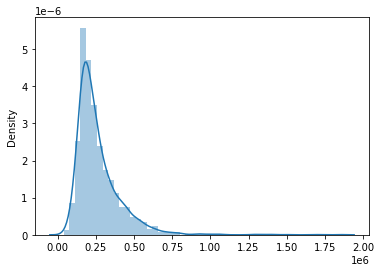

[Row(skewness(LISTPRICE)=2.790448093916559)]


In [32]:
sample_df = df.select(['LISTPRICE']).sample(False, .5, 42)
pandas_df = sample_df.toPandas()

sns.distplot(pandas_df)
plt.show()

from pyspark.sql.functions import skewness
print(df.agg({'LISTPRICE': 'skewness'}).collect())

# Using Visualizations: lmplot

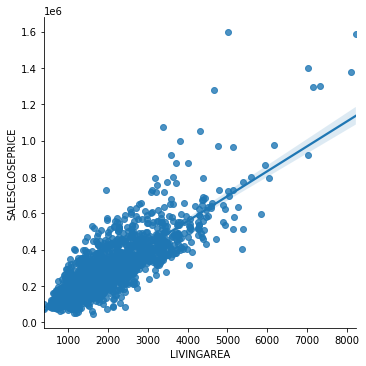

In [33]:
sample_df = df.select(['SALESCLOSEPRICE','LIVINGAREA']).sample(False, .5, 42)
pandas_df = sample_df.toPandas()
sns.lmplot(x='LIVINGAREA', y='SALESCLOSEPRICE', data=pandas_df)

# Wrangling with Spark Functions

## Dropping a list of columns


In [34]:
cols_to_drop = ['STREETNUMBERNUMERIC', 'LOTSIZEDIMENSIONS']
df = df.drop(*cols_to_drop)

## Using text filters to remove records

In [35]:
df.select(['ASSUMABLEMORTGAGE']).distinct().show()

yes_values = ['Yes w/ Qualifying', 'Yes w/No Qualifying']

text_filter = ~df['ASSUMABLEMORTGAGE'].isin(yes_values) | df['ASSUMABLEMORTGAGE'].isNull()
df = df.where(text_filter)

print(df.count())

+-------------------+
|  ASSUMABLEMORTGAGE|
+-------------------+
|  Yes w/ Qualifying|
| Information Coming|
|               null|
|Yes w/No Qualifying|
|      Not Assumable|
+-------------------+

4976


# Filtering numeric fields conditionally


In [36]:
from pyspark.sql.functions import log

df = df.withColumn('log_SalesClosePrice', log('SalesClosePrice'))

In [37]:
from pyspark.sql.functions import mean, stddev

mean_val = df.agg({'log_SalesClosePrice': 'mean'}).collect()[0][0]
stddev_val = df.agg({'log_SalesClosePrice': 'stddev'}).collect()[0][0]


low_bound = mean_val - (3 * stddev_val)
hi_bound = mean_val + (3 * stddev_val)


df = df.where((df['log_SalesClosePrice'] < hi_bound) & (df['log_SalesClosePrice'] > low_bound))

## Custom Percentage Scaling

In [38]:
from pyspark.sql.functions import round

max_days = df.agg({'DAYSONMARKET': 'max'}).collect()[0][0]
min_days = df.agg({'DAYSONMARKET': 'min'}).collect()[0][0]

df = df.withColumn('percentage_scaled_days', 
                  round((df['DAYSONMARKET'] - min_days) / (max_days - min_days)) * 100)

print(df.agg({'percentage_scaled_days': 'max'}).collect())
print(df.agg({'percentage_scaled_days': 'min'}).collect())

[Row(max(percentage_scaled_days)=100.0)]
[Row(min(percentage_scaled_days)=0.0)]


## Scaling your scalers

In [39]:
def min_max_scaler(df, cols_to_scale):
    for col in cols_to_scale:
        max_days = df.agg({col: 'max'}).collect()[0][0]
        min_days = df.agg({col: 'min'}).collect()[0][0]
        new_column_name = 'scaled_' + col
        df = df.withColumn(new_column_name, 
                          (df[col] - min_days) / (max_days - min_days))
    return df
  
df = min_max_scaler(df, ['FOUNDATIONSIZE', 'DAYSONMARKET', 'FIREPLACES'])
df[['DAYSONMARKET', 'scaled_DAYSONMARKET']].show()

+------------+--------------------+
|DAYSONMARKET| scaled_DAYSONMARKET|
+------------+--------------------+
|          10|0.044444444444444446|
|           4|0.017777777777777778|
|          28| 0.12444444444444444|
|          19| 0.08444444444444445|
|          21| 0.09333333333333334|
|          17| 0.07555555555555556|
|          32| 0.14222222222222222|
|           5|0.022222222222222223|
|          23| 0.10222222222222223|
|          73|  0.3244444444444444|
|          80| 0.35555555555555557|
|          79|  0.3511111111111111|
|          12| 0.05333333333333334|
|           1|0.004444444444444...|
|          18|                0.08|
|           2|0.008888888888888889|
|          12| 0.05333333333333334|
|          45|                 0.2|
|          31| 0.13777777777777778|
|          16| 0.07111111111111111|
+------------+--------------------+
only showing top 20 rows



## Correcting Right Skew Data

In [40]:
print(df.agg({'YEARBUILT': 'skewness'}).collect())

max_year = df.agg({'YEARBUILT': 'max'}).collect()[0][0]

df = df.withColumn('Reflect_YearBuilt', (max_year + 1) - df['YEARBUILT'])

df = df.withColumn('adj_yearbuilt', 1 / log(df['Reflect_YearBuilt']))

[Row(skewness(YEARBUILT)=-0.25317374723020336)]


## Visualizing Missing Data


In [41]:
columns = ['APPLIANCES',
 'BACKONMARKETDATE',
 'ROOMFAMILYCHAR',
 'BASEMENT',
 'DININGROOMDESCRIPTION']

df.select(columns).show()

+--------------------+----------------+--------------------+--------------------+---------------------+
|          APPLIANCES|BACKONMARKETDATE|      ROOMFAMILYCHAR|            BASEMENT|DININGROOMDESCRIPTION|
+--------------------+----------------+--------------------+--------------------+---------------------+
|Range, Dishwasher...|            null|                null|                Full|       Eat In Kitchen|
|Range, Microwave,...|            null|         Lower Level|Full, Partial Fin...| Informal Dining R...|
|Range, Microwave,...|            null|                null|Full, Crawl Space...| Informal Dining Room|
|Range, Washer, Dryer|            null|          Main Level|Full, Partial Fin...|                 null|
|Range, Exhaust Fa...|            null|         Lower Level|Walkout, Full, Fi...| Breakfast Area, K...|
|Range, Microwave,...|            null|                null|Full, Sump Pump, ...| Separate/Formal D...|
|Range, Microwave,...|            null|                Loft|    

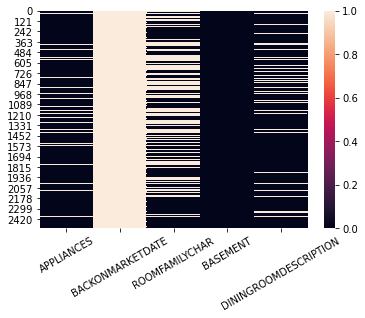

'BACKONMARKETDATE'

In [42]:
sample_df = df.select(columns).sample(False, 0.5, 42)
pandas_df = sample_df.toPandas()

tf_df = pandas_df.isnull()


sns.heatmap(data=tf_df)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

answer = 'BACKONMARKETDATE'
answer

## Imputing Missing Data

In [43]:
missing = df.where(df['PDOM'].isNull()).count()

col_mean = df.agg({'PDOM': 'mean'}).collect()[0][0]

df.fillna(col_mean, subset=['PDOM'])

DataFrame[NO: bigint, MLSID: string, STREETADDRESS: string, STREETNAME: string, POSTALCODE: bigint, STATEORPROVINCE: string, CITY: string, SALESCLOSEPRICE: bigint, LISTDATE: string, LISTPRICE: bigint, LISTTYPE: string, ORIGINALLISTPRICE: bigint, PRICEPERTSFT: double, FOUNDATIONSIZE: bigint, FENCE: string, MAPLETTER: string, SCHOOLDISTRICTNUMBER: string, DAYSONMARKET: bigint, OFFMARKETDATE: string, FIREPLACES: bigint, ROOMAREA4: string, ROOMTYPE: string, ROOF: string, ROOMFLOOR4: string, POTENTIALSHORTSALE: string, POOLDESCRIPTION: string, PDOM: bigint, GARAGEDESCRIPTION: string, SQFTABOVEGROUND: bigint, TAXES: bigint, ROOMFLOOR1: string, ROOMAREA1: string, TAXWITHASSESSMENTS: double, TAXYEAR: bigint, LIVINGAREA: bigint, UNITNUMBER: string, YEARBUILT: bigint, ZONING: string, STYLE: string, ACRES: double, COOLINGDESCRIPTION: string, APPLIANCES: string, BACKONMARKETDATE: double, ROOMFAMILYCHAR: string, ROOMAREA3: string, EXTERIOR: string, ROOMFLOOR3: string, ROOMFLOOR2: string, ROOMAREA2:

## Calculate Missing Percents

In [44]:
def column_dropper(df, threshold):
    total_records = df.count()
    for col in df.columns:
        missing = df.where(df[col].isNull()).count()
        missing_percent = missing / total_records

        if missing_percent > threshold:
            df = df.drop(col)
    return df

df = column_dropper(df, .6)

# Feature Engineering

## Differences

In [46]:
acres_to_sqfeet = 43560
df = df.withColumn('LOT_SIZE_SQFT', df['ACRES'] * acres_to_sqfeet)

df = df.withColumn('YARD_SIZE', df['LOT_SIZE_SQFT'] - df['FOUNDATIONSIZE'])

print("Corr of ACRES vs SALESCLOSEPRICE: " + str(df.corr('ACRES', 'SALESCLOSEPRICE')))
print("Corr of FOUNDATIONSIZE vs SALESCLOSEPRICE: " + str(df.corr('FOUNDATIONSIZE', 'SALESCLOSEPRICE')))
print("Corr of YARD_SIZE vs SALESCLOSEPRICE: " + str(df.corr('YARD_SIZE', 'SALESCLOSEPRICE')))

Corr of ACRES vs SALESCLOSEPRICE: 0.2130819260750225
Corr of FOUNDATIONSIZE vs SALESCLOSEPRICE: 0.5976957088401492
Corr of YARD_SIZE vs SALESCLOSEPRICE: 0.20032633979612804


## Ratios

In [47]:
df = df.withColumn('ASSESSED_TO_LIST', df['ASSESSEDVALUATION'] / df['LISTPRICE'])
df[['ASSESSEDVALUATION', 'LISTPRICE', 'ASSESSED_TO_LIST']].show(5)

df = df.withColumn('TAX_TO_LIST', df['TAXES'] / df['LISTPRICE'])
df[['TAX_TO_LIST', 'TAXES', 'LISTPRICE']].show(5)

df = df.withColumn('BED_TO_BATHS', df['BEDROOMS'] / df['BATHSTOTAL'])
df[['BED_TO_BATHS', 'BEDROOMS', 'BATHSTOTAL']].show(5)

+-----------------+---------+----------------+
|ASSESSEDVALUATION|LISTPRICE|ASSESSED_TO_LIST|
+-----------------+---------+----------------+
|              0.0|   139900|             0.0|
|              0.0|   210000|             0.0|
|              0.0|   225000|             0.0|
|              0.0|   230000|             0.0|
|              0.0|   239900|             0.0|
+-----------------+---------+----------------+
only showing top 5 rows

+--------------------+-----+---------+
|         TAX_TO_LIST|TAXES|LISTPRICE|
+--------------------+-----+---------+
|0.013280914939242315| 1858|   139900|
| 0.00780952380952381| 1640|   210000|
|0.010622222222222222| 2390|   225000|
|0.009330434782608695| 2146|   230000|
|0.008378491037932471| 2010|   239900|
+--------------------+-----+---------+
only showing top 5 rows

+------------------+--------+----------+
|      BED_TO_BATHS|BEDROOMS|BATHSTOTAL|
+------------------+--------+----------+
|               1.5|       3|         2|
|1.333333333

# Deeper Features

In [48]:
from scipy import stats

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

+-------+-------------------+
|summary| BATHS_PER_1000SQFT|
+-------+-------------------+
|  count|               4946|
|   mean| 1.4339460530042523|
| stddev| 14.205761576339642|
|    min|0.39123630672926446|
|    max|             1000.0|
+-------+-------------------+



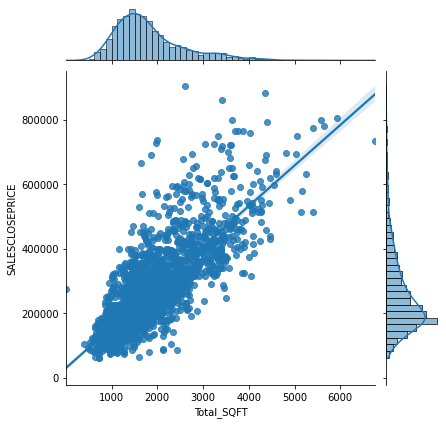

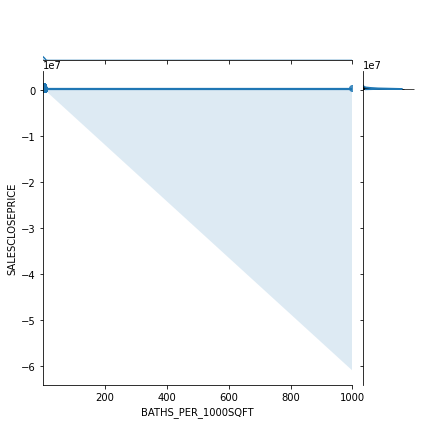

In [51]:
df = df.withColumn('Total_SQFT', df['SQFTBELOWGROUND'] + df['SQFTABOVEGROUND'])

df = df.withColumn('BATHS_PER_1000SQFT', df['BATHSTOTAL'] / (df['Total_SQFT'] / 1000))
df[['BATHS_PER_1000SQFT']].describe().show()

pandas_df = df.sample(False, 0.5, 0).toPandas()

sns.jointplot(x='Total_SQFT', y='SALESCLOSEPRICE', data=pandas_df, kind="reg")
sns.jointplot(x='BATHS_PER_1000SQFT', y='SALESCLOSEPRICE', data=pandas_df, kind="reg")

## Joining On Time Components


In [56]:
import pandas as pd

data = dict(City=['LELM - Lake Elmo', 'MAPW - Maplewood','STP - Saint Paul','WB - Woodbury', \
                  'OAKD - Oakdale', 'LELM - Lake Elmo', 'MAPW - Maplewood', \
                  'STP - Saint Paul', 'WB - Woodbury', 'OAKD - Oakdale'],
     MedianHomeValue=[401000, 193000, 172000, 291000, 210000, 385000, 187000, 162000, 277000, 192000],
     Year= [2016,2016,2016,2016,2016,2015,2015,2015,2015, 2015])

df_price = pd.DataFrame(data)
price_df = spark.createDataFrame(df_price)